In [92]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [93]:
df1 = pd.read_csv("ottawa-realestate-data.csv")
df1.head()

,latitude,longitude,postalCode,walkScore,propertyType,style,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,price
0,45.442725,-76.048296,K0A 1L0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,1127.76,1447.80,"2,500,000"
1,45.146541,-75.941510,K0A 1B0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,1402.08,609.60,"495,000"
2,45.317009,-76.140878,K0A 1L0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,638.86,470.92,"365,000"
3,46.179294,-74.727161,K4C 1H9,7.0,Commercial,NaN,2020.0,NaN,NaN,0.0,NaN,545.59,411.48,"799,000"
4,45.314785,-75.563076,K1G 3N4,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,983.60,402.17,"9,830,500"


In [94]:
df1.shape

(1255, 14)

In [95]:
df1.groupby('propertyType')['propertyType'].agg('count')

propertyType
Commercial        24
Designated         4
Farm               8
Lots/Acreage     108
Multi-family       2
Multifamily       47
Residential      976
Retail             1
Single Family     14
Vacant Land        7
Name: propertyType, dtype: int64

In [96]:
df1['style'].isna().sum()

231

In [97]:
df1['yearBuilt'].isna().sum()

258

In [98]:
df1.isna().sum()

latitude          1
longitude         1
postalCode       57
walkScore        30
propertyType     64
style           231
yearBuilt       258
bedrooms        215
bathrooms       214
parking         212
garage          240
lotDepth        555
lotFrontage     555
price            22
dtype: int64

In [99]:
df2 = df1.drop(['latitude', 'longitude', 'postalCode'], axis='columns')
df2.head()

,walkScore,propertyType,style,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,price
0,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,1127.76,1447.80,"2,500,000"
1,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,1402.08,609.60,"495,000"
2,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,638.86,470.92,"365,000"
3,7.0,Commercial,NaN,2020.0,NaN,NaN,0.0,NaN,545.59,411.48,"799,000"
4,1.0,Lots/Acreage,NaN,NaN,NaN,NaN,NaN,NaN,983.60,402.17,"9,830,500"


In [100]:
df2.isnull().sum()

walkScore        30
propertyType     64
style           231
yearBuilt       258
bedrooms        215
bathrooms       214
parking         212
garage          240
lotDepth        555
lotFrontage     555
price            22
dtype: int64

In [109]:
df2["price"]=df2["price"].str.replace(',','')
df2["price"] = df2["price"].astype(float) 
df2.head()
df2.dtypes

walkScore       float64
propertyType     object
style            object
yearBuilt       float64
bedrooms        float64
bathrooms       float64
parking         float64
garage          float64
lotDepth        float64
lotFrontage     float64
price           float64
dtype: object

<AxesSubplot:xlabel='lotDepth', ylabel='Count'>

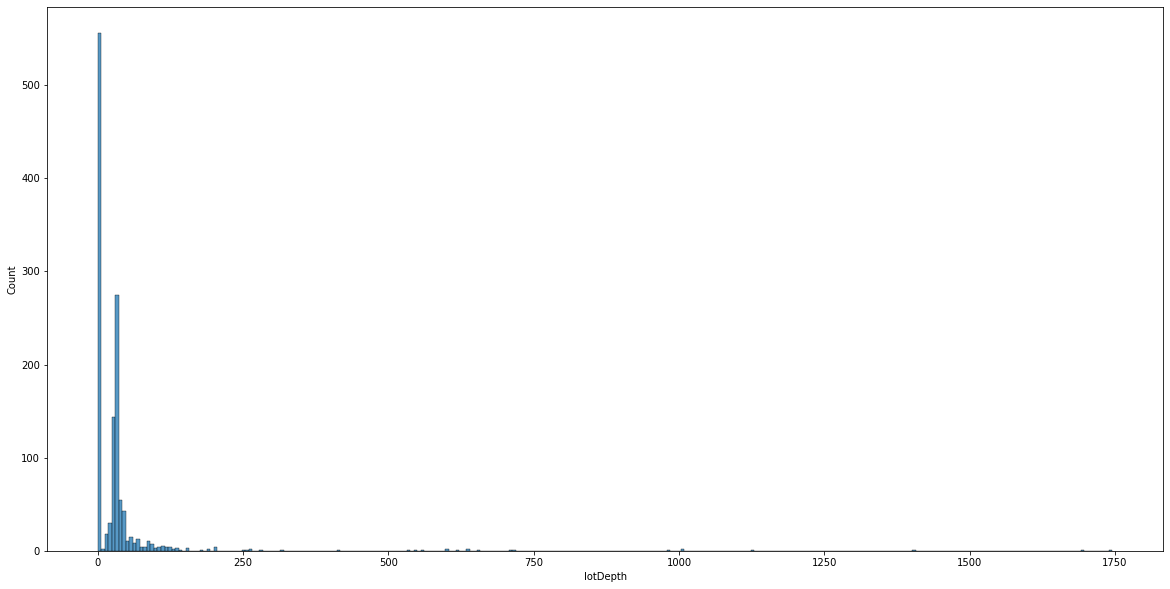

In [110]:
import seaborn as sns

# sns.histplot(df2.price)
# sns.histplot(df2.walkScore)
# sns.histplot(df2.bedrooms)
# sns.histplot(df2.bathrooms)
# sns.histplot(df2.parking)
sns.histplot(df2.lotDepth)
# sns.histplot(df2.lotFrontage)

In [111]:
df3 = df2.dropna()
df3.head()

,walkScore,propertyType,style,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,price
10,5.0,Residential,Detached,1946.0,3.0,0.0,10.0,0.0,598.72,265.61,1100000.0
11,5.0,Residential,Detached,1946.0,3.0,0.0,10.0,0.0,598.72,265.61,1100000.0
12,3.0,Residential,Detached,1984.0,6.0,4.0,8.0,2.0,283.20,265.05,960000.0
13,1.0,Residential,Detached,2012.0,4.0,6.0,10.0,3.0,122.68,254.57,3850000.0
15,1.0,Residential,Detached,2008.0,5.0,3.0,12.0,3.0,716.89,243.84,1899999.0


In [112]:
df3.shape

(929, 11)

<AxesSubplot:xlabel='price', ylabel='Count'>

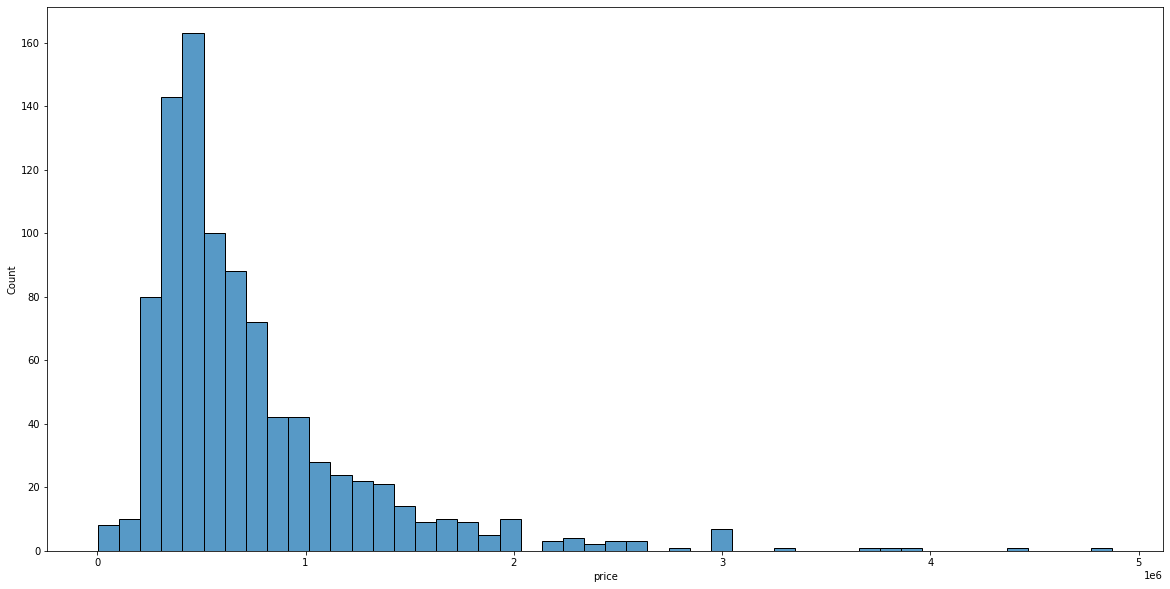

In [113]:
sns.histplot(df3.price)

In [114]:
df2.head()

,walkScore,propertyType,style,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,price
0,1.0,Lots/Acreage,NaN,NaN,0.0,0.0,0.0,0.0,1127.76,1447.80,2500000.0
1,1.0,Lots/Acreage,NaN,NaN,0.0,0.0,0.0,0.0,1402.08,609.60,495000.0
2,1.0,Lots/Acreage,NaN,NaN,0.0,0.0,0.0,0.0,638.86,470.92,365000.0
3,7.0,Commercial,NaN,2020.0,0.0,0.0,0.0,0.0,545.59,411.48,799000.0
4,1.0,Lots/Acreage,NaN,NaN,0.0,0.0,0.0,0.0,983.60,402.17,9830500.0


In [115]:
df2["price"] = df2["price"].fillna(0)
df2["walkScore"] = df2["walkScore"].fillna(0)
df2["bedrooms"] = df2["bedrooms"].fillna(0)
df2["bathrooms"] = df2["bathrooms"].fillna(0)
df2["parking"] = df2["parking"].fillna(0)
df2["lotDepth"] = df2["lotDepth"].fillna(0)
df2["lotFrontage"] = df2["lotFrontage"].fillna(0)
df2["garage"] = df2["garage"].fillna(0)

In [116]:
df2["price"].fillna(df2["price"].median())
df2["walkScore"].fillna(df2["walkScore"].median())
df2["bedrooms"].fillna(df2["bedrooms"].median())
df2["bathrooms"].fillna(df2["bathrooms"].median())
df2["parking"].fillna(df2["parking"].median())
df2["lotDepth"].fillna(df2["lotDepth"].median())
df2["lotFrontage"].fillna(df2["lotFrontage"].median())
df2["garage"].fillna(df2["garage"].median())

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1250    0.0
1251    0.0
1252    0.0
1253    0.0
1254    0.0
Name: garage, Length: 1255, dtype: float64

In [117]:
df2.isna().sum()

walkScore         0
propertyType     64
style           231
yearBuilt       258
bedrooms          0
bathrooms         0
parking           0
garage            0
lotDepth          0
lotFrontage       0
price             0
dtype: int64

In [118]:
df2

,walkScore,propertyType,style,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,price
0,1.0,Lots/Acreage,NaN,NaN,0.0,0.0,0.0,0.0,1127.76,1447.80,2500000.0
1,1.0,Lots/Acreage,NaN,NaN,0.0,0.0,0.0,0.0,1402.08,609.60,495000.0
2,1.0,Lots/Acreage,NaN,NaN,0.0,0.0,0.0,0.0,638.86,470.92,365000.0
3,7.0,Commercial,NaN,2020.0,0.0,0.0,0.0,0.0,545.59,411.48,799000.0
4,1.0,Lots/Acreage,NaN,NaN,0.0,0.0,0.0,0.0,983.60,402.17,9830500.0
...,...,...,...,...,...,...,...,...,...,...,...
1250,1.0,Vacant Land,NaN,NaN,0.0,0.0,0.0,0.0,0.00,0.00,3200000.0
1251,1.0,Vacant Land,NaN,NaN,0.0,0.0,0.0,0.0,0.00,0.00,600000.0
1252,1.0,Vacant Land,NaN,NaN,0.0,0.0,0.0,0.0,0.00,0.00,99000.0
1253,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.00,0.00,0.0


In [119]:
df4 = df2.dropna()

In [120]:
df4

,walkScore,propertyType,style,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,price
10,5.0,Residential,Detached,1946.0,3.0,0.0,10.0,0.0,598.72,265.61,1100000.0
11,5.0,Residential,Detached,1946.0,3.0,0.0,10.0,0.0,598.72,265.61,1100000.0
12,3.0,Residential,Detached,1984.0,6.0,4.0,8.0,2.0,283.20,265.05,960000.0
13,1.0,Residential,Detached,2012.0,4.0,6.0,10.0,3.0,122.68,254.57,3850000.0
15,1.0,Residential,Detached,2008.0,5.0,3.0,12.0,3.0,716.89,243.84,1899999.0
...,...,...,...,...,...,...,...,...,...,...,...
1145,1.0,Residential,Detached,1900.0,3.0,2.0,20.0,2.0,0.00,0.00,774900.0
1146,89.0,Residential,Row Unit,1874.0,3.0,3.0,1.0,1.0,0.00,0.00,509000.0
1147,83.0,Residential,Apartment,1873.0,2.0,2.0,2.0,0.0,0.00,0.00,749900.0
1148,1.0,Farm,Detached,1850.0,3.0,3.0,10.0,2.0,0.00,0.00,1339000.0


In [121]:
df4.isnull().sum()

walkScore       0
propertyType    0
style           0
yearBuilt       0
bedrooms        0
bathrooms       0
parking         0
garage          0
lotDepth        0
lotFrontage     0
price           0
dtype: int64

In [125]:
df4["propertyType"].unique()

array(['Residential', 'Farm'], dtype=object)

In [126]:
df4["style"].unique()

array(['Detached', 'Apartment', 'Semi Detached', 'Row Unit', 'Stacked'],
      dtype=object)

In [127]:
df4.loc[~(df4==0).all(axis=1)]

,walkScore,propertyType,style,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,price
10,5.0,Residential,Detached,1946.0,3.0,0.0,10.0,0.0,598.72,265.61,1100000.0
11,5.0,Residential,Detached,1946.0,3.0,0.0,10.0,0.0,598.72,265.61,1100000.0
12,3.0,Residential,Detached,1984.0,6.0,4.0,8.0,2.0,283.20,265.05,960000.0
13,1.0,Residential,Detached,2012.0,4.0,6.0,10.0,3.0,122.68,254.57,3850000.0
15,1.0,Residential,Detached,2008.0,5.0,3.0,12.0,3.0,716.89,243.84,1899999.0
...,...,...,...,...,...,...,...,...,...,...,...
1145,1.0,Residential,Detached,1900.0,3.0,2.0,20.0,2.0,0.00,0.00,774900.0
1146,89.0,Residential,Row Unit,1874.0,3.0,3.0,1.0,1.0,0.00,0.00,509000.0
1147,83.0,Residential,Apartment,1873.0,2.0,2.0,2.0,0.0,0.00,0.00,749900.0
1148,1.0,Farm,Detached,1850.0,3.0,3.0,10.0,2.0,0.00,0.00,1339000.0


In [131]:
df4 = df4[df4["lotDepth"] !=0]

In [132]:
df4 = df4[df4["lotFrontage"] !=0]

In [133]:
df4

,walkScore,propertyType,style,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,price
10,5.0,Residential,Detached,1946.0,3.0,0.0,10.0,0.0,598.72,265.61,1100000.0
11,5.0,Residential,Detached,1946.0,3.0,0.0,10.0,0.0,598.72,265.61,1100000.0
12,3.0,Residential,Detached,1984.0,6.0,4.0,8.0,2.0,283.20,265.05,960000.0
13,1.0,Residential,Detached,2012.0,4.0,6.0,10.0,3.0,122.68,254.57,3850000.0
15,1.0,Residential,Detached,2008.0,5.0,3.0,12.0,3.0,716.89,243.84,1899999.0
...,...,...,...,...,...,...,...,...,...,...,...
695,83.0,Residential,Row Unit,1887.0,1.0,1.0,0.0,0.0,6.95,4.42,435000.0
696,76.0,Residential,Row Unit,1905.0,3.0,2.0,2.0,0.0,25.60,4.30,299000.0
697,72.0,Residential,Detached,1974.0,6.0,3.0,5.0,0.0,35.47,4.14,900000.0
698,72.0,Residential,Detached,1974.0,6.0,3.0,5.0,0.0,35.47,4.14,900000.0


In [136]:
df4["propertyType"].unique()

array(['Residential'], dtype=object)

In [138]:
df4.drop("propertyType", axis=1, inplace=True)

In [140]:
df4.drop("propertyTypeEncoded", axis=1, inplace=True)

In [141]:
df4["style"].unique()

array(['Detached', 'Apartment', 'Semi Detached', 'Row Unit'], dtype=object)

In [142]:
# df4["propertyTypeEncoded"] = df4["propertyType"].copy()

from sklearn.preprocessing import LabelEncoder
label_make = LabelEncoder()

df4["styleEncoded"] = label_make.fit_transform(df4['style'])

In [144]:
df4.drop("style", axis=1, inplace=True)

In [145]:
df4

,walkScore,yearBuilt,bedrooms,bathrooms,parking,garage,lotDepth,lotFrontage,price,styleEncoded
10,5.0,1946.0,3.0,0.0,10.0,0.0,598.72,265.61,1100000.0,1
11,5.0,1946.0,3.0,0.0,10.0,0.0,598.72,265.61,1100000.0,1
12,3.0,1984.0,6.0,4.0,8.0,2.0,283.20,265.05,960000.0,1
13,1.0,2012.0,4.0,6.0,10.0,3.0,122.68,254.57,3850000.0,1
15,1.0,2008.0,5.0,3.0,12.0,3.0,716.89,243.84,1899999.0,1
...,...,...,...,...,...,...,...,...,...,...
695,83.0,1887.0,1.0,1.0,0.0,0.0,6.95,4.42,435000.0,2
696,76.0,1905.0,3.0,2.0,2.0,0.0,25.60,4.30,299000.0,2
697,72.0,1974.0,6.0,3.0,5.0,0.0,35.47,4.14,900000.0,1
698,72.0,1974.0,6.0,3.0,5.0,0.0,35.47,4.14,900000.0,1
